Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dict_keys(['average_game_length', 'max_game_length', 'builder_wins', 'forbidder_wins', 'nobody_wins', 'average_builder_return', 'builder_policy_loss', 'builder_critic_loss', 'average_forbidder_return', 'forbidder_policy_loss', 'forbidder_critic_loss'])


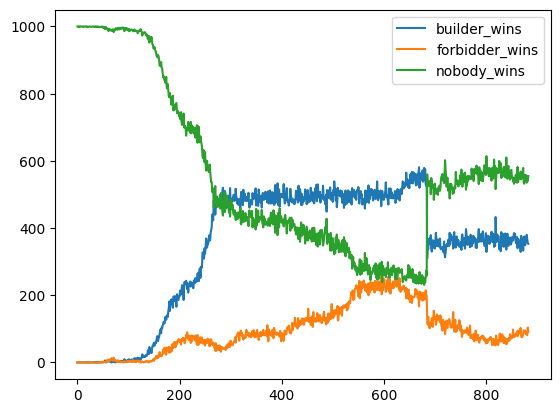

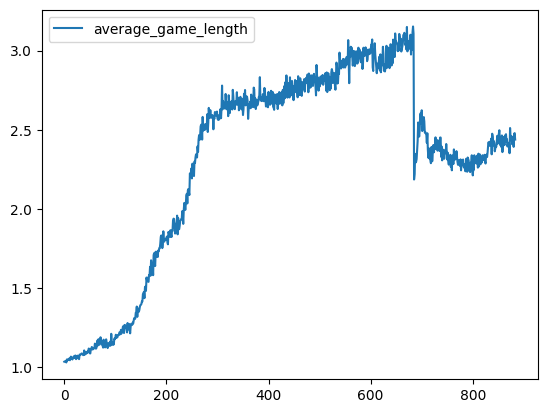

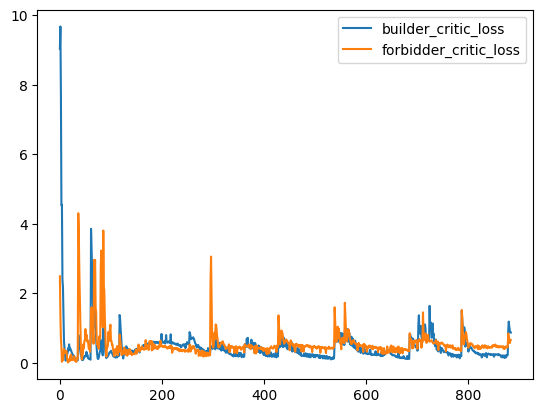

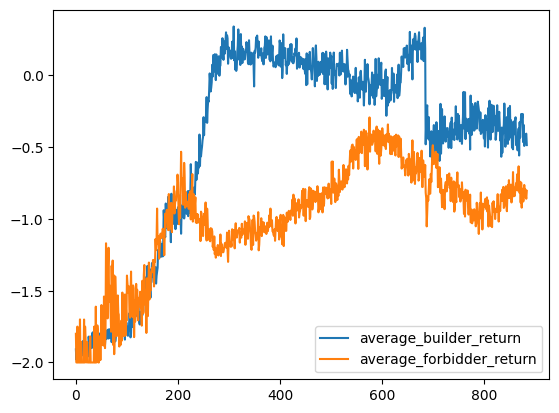

In [3]:
import torch
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
WORKING_DIRECTORY = "/content/drive/MyDrive/Colab Notebooks/CompetiClique"
os.chdir(WORKING_DIRECTORY)
cpu = torch.device('cpu')
state = {player_name : torch.load(f'models/18_{player_name}_agent_c4_m5_n3.pt', map_location=cpu) for player_name in ['builder', 'forbidder']}

for player, player_state in state.items():
  stats = player_state['agent_training_stats']
  print(stats[0][0].keys())

  num_batches = len(stats)
  train_keys, eval_keys = ['builder_wins', 'forbidder_wins', 'nobody_wins'], ['builder_wins', 'forbidder_wins', 'nobody_wins']

  t_or_e = 0
  keys = train_keys
  for key in keys:
    y = [batch_info[t_or_e][key] for batch_info in stats]
    x = range(num_batches)
    plt.plot(x, y, label=key)
  plt.legend()
  plt.show()

  keys = ['average_game_length']
  for key in keys:
    y = [batch_info[t_or_e][key] for batch_info in stats]
    x = range(num_batches)
    plt.plot(x, y, label=key)
  plt.legend()
  plt.show()

  keys = ['builder_critic_loss', 'forbidder_critic_loss']
  for key in keys:
    y = [batch_info[t_or_e][key] for batch_info in stats]
    x = range(num_batches)
    plt.plot(x, y, label=key)
  plt.legend()
  plt.show()

  t_or_e = 1
  keys = ['average_builder_return', 'average_forbidder_return']
  for key in keys:
    y = [batch_info[t_or_e][key] for batch_info in stats]#[-200:]
    x = range(num_batches)#[-200:]
    plt.plot(x, y, label=key)
  plt.legend()
  plt.show()

  break